### LAB Assessment 2 - Group 5

In [1]:
#Importing libraries
import pandas as pd
import numpy as np

In [2]:
#loading the dataset
data = pd.read_csv('real_estate.csv')
data = data.drop('Name',axis = 1)
data = data.iloc[0:23,]

In [3]:
#displaying dataset
data

,Place,Location,Area (sqft),Type of land,Facing,Possession,Date Listed,Fully Furnished,Car parking,Price (crores)
0,Mussoorie,Kolukhet,3984,House,East,Ready,01/03/2021,Semi,Yes,0.65
1,Mussoorie,Kolukhet,2455,House,East,Ready,01/03/2021,Furnished,Yes,0.45
2,Mussoorie,Mall Road,7000,Farm House,North,New,27/02/2021,Furnished,Yes,7.00
3,Mussoorie,Mall Road,2500,House,North-West,Ready,25/02/2021,Semi,Yes,0.01
4,Mussoorie,Mussoorie Range,500,Apartment,East,Ready,14/02/2021,Furnished,Yes,0.57
5,Mussoorie,Kempty,2500,Farm House,East,Ready,09/02/2021,Furnished,Yes,4.00
6,Mussoorie,Landour,900,Farm House,North,Ready,03/02/2021,Unfurnished,No,12.00
7,Mussoorie,Kulri,500,Apartment,North-East,Ready,03/02/2021,Semi,Yes,0.32
8,Mussoorie,Hasanganj,350,Apartment,North-East,Ready,10/12/2020,Furnished,No,0.20
9,Mussoorie,IT Park,2000,Houses,North-East,Ready,16/02/2021,Furnished,Yes,0.51


## <font color='blue'> FEATURE ENGINEERING

### 1: Binarisation

In [4]:
#Binarization of Yes and No
data['Car parking'] = data['Car parking'].replace({'Yes':'1','No':'0'})
data.head()

,Place,Location,Area (sqft),Type of land,Facing,Possession,Date Listed,Fully Furnished,Car parking,Price (crores)
0,Mussoorie,Kolukhet,3984,House,East,Ready,01/03/2021,Semi,1,0.65
1,Mussoorie,Kolukhet,2455,House,East,Ready,01/03/2021,Furnished,1,0.45
2,Mussoorie,Mall Road,7000,Farm House,North,New,27/02/2021,Furnished,1,7.00
3,Mussoorie,Mall Road,2500,House,North-West,Ready,25/02/2021,Semi,1,0.01
4,Mussoorie,Mussoorie Range,500,Apartment,East,Ready,14/02/2021,Furnished,1,0.57


### 2: Normalization 

In [5]:
#Normalization of area (Range: 0 to 1)
data['Area (sqft)'] = (data['Area (sqft)'] - data['Area (sqft)'].min()) / (data['Area (sqft)'].max() - data['Area (sqft)'].min())

In [6]:
data.head()

,Place,Location,Area (sqft),Type of land,Facing,Possession,Date Listed,Fully Furnished,Car parking,Price (crores)
0,Mussoorie,Kolukhet,0.546466,House,East,Ready,01/03/2021,Semi,1,0.65
1,Mussoorie,Kolukhet,0.316541,House,East,Ready,01/03/2021,Furnished,1,0.45
2,Mussoorie,Mall Road,1.000000,Farm House,North,New,27/02/2021,Furnished,1,7.00
3,Mussoorie,Mall Road,0.323308,House,North-West,Ready,25/02/2021,Semi,1,0.01
4,Mussoorie,Mussoorie Range,0.022556,Apartment,East,Ready,14/02/2021,Furnished,1,0.57


### 3: Handling missing data

In [7]:
#replacing null values with nan
data=data.replace("",np.nan)

In [8]:
#M = data.loc[data["Place"]=="Manali"]
#Mu = data.loc[data["Place"]=="Maussoorie"]

In [15]:
data.head()

,Place,Location,Area (sqft),Type of land,Facing,Possession,Date Listed,Fully Furnished,Car parking,Price (crores),year,month
0,Mussoorie,Kolukhet,0.546466,3,East,1,2021-01-03,1,1,0.65,2021,1
1,Mussoorie,Kolukhet,0.316541,3,East,1,2021-01-03,0,1,0.45,2021,1
2,Mussoorie,Mall Road,1.000000,2,North,0,2021-02-27,0,1,7.00,2021,2
3,Mussoorie,Mall Road,0.323308,3,North-West,1,2021-02-25,1,1,0.01,2021,2
4,Mussoorie,Mussoorie Range,0.022556,0,East,1,2021-02-14,0,1,0.57,2021,2


### 4: Label Encoding

In [16]:
#label encoding 
from sklearn.preprocessing import LabelEncoder 
  
le = LabelEncoder() 
data['Type of land']= le.fit_transform(data['Type of land']) 
data['Fully Furnished']= le.fit_transform(data['Fully Furnished']) 
data['Possession']= le.fit_transform(data['Possession']) 


In [17]:
data.head()

,Place,Location,Area (sqft),Type of land,Facing,Possession,Date Listed,Fully Furnished,Car parking,Price (crores),year,month
0,Mussoorie,Kolukhet,0.546466,3,East,1,2021-01-03,1,1,0.65,2021,1
1,Mussoorie,Kolukhet,0.316541,3,East,1,2021-01-03,0,1,0.45,2021,1
2,Mussoorie,Mall Road,1.000000,2,North,0,2021-02-27,0,1,7.00,2021,2
3,Mussoorie,Mall Road,0.323308,3,North-West,1,2021-02-25,1,1,0.01,2021,2
4,Mussoorie,Mussoorie Range,0.022556,0,East,1,2021-02-14,0,1,0.57,2021,2


### 5. Date-time formatting

In [18]:
# converting date from type object to date-time format
data['Date Listed'] = pd.to_datetime(data['Date Listed'])

In [19]:
#separating into days, months and year
#Extracting Year
data['year'] = data['Date Listed'].dt.year

#Extracting Month
data['month'] = data['Date Listed'].dt.month

data.head()

,Place,Location,Area (sqft),Type of land,Facing,Possession,Date Listed,Fully Furnished,Car parking,Price (crores),year,month
0,Mussoorie,Kolukhet,0.546466,3,East,1,2021-01-03,1,1,0.65,2021,1
1,Mussoorie,Kolukhet,0.316541,3,East,1,2021-01-03,0,1,0.45,2021,1
2,Mussoorie,Mall Road,1.000000,2,North,0,2021-02-27,0,1,7.00,2021,2
3,Mussoorie,Mall Road,0.323308,3,North-West,1,2021-02-25,1,1,0.01,2021,2
4,Mussoorie,Mussoorie Range,0.022556,0,East,1,2021-02-14,0,1,0.57,2021,2


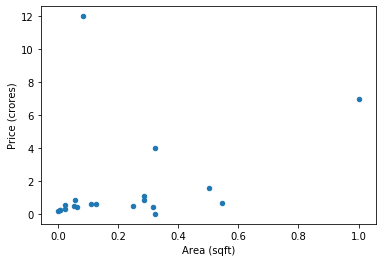

In [22]:
#Plotting a scatter plot
import matplotlib.pyplot as plt
data.plot(x='Area (sqft)', y = 'Price (crores)', kind='scatter')
plt.show()

In [21]:
#plt.plot(data["Area (sqft)"], data["Price (crores)"], marker='o')
#plt.title('title name')
#plt.xlabel('Area')
#plt.ylabel('Price')
#plt.show()

### Linear Regression on scatter plot

In [23]:
from sklearn.linear_model import LinearRegression

X = data.iloc[:, 2].values.reshape(-1, 1) #converting it into a numpy array
Y = data.iloc[:, 9].values.reshape(-1, 1) #-1 - calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

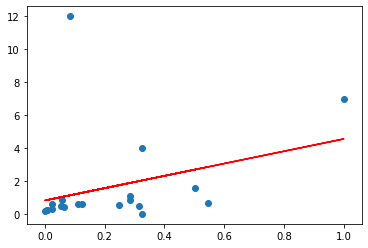

In [24]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

## Insights from the data

In [25]:
type(data)

pandas.core.frame.DataFrame

In [26]:
data.describe()

,Area (sqft),Type of land,Possession,Fully Furnished,Price (crores),year,month
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.218955,1.750000,1.100000,0.500000,1.633000,2020.950000,3.300000
std,0.248488,1.446411,0.447214,0.760886,2.933107,0.223607,2.792848
min,0.000000,0.000000,0.000000,0.000000,0.010000,2020.000000,1.000000
25%,0.045113,0.000000,1.000000,0.000000,0.380000,2021.000000,2.000000
50%,0.117293,2.000000,1.000000,0.000000,0.595000,2021.000000,2.000000
75%,0.318233,3.000000,1.000000,1.000000,0.912500,2021.000000,3.000000
max,1.000000,4.000000,2.000000,2.000000,12.000000,2021.000000,10.000000


In [27]:
#datatype for each column
for i in data:
    print(i)
    print(data[i].dtypes) 
    print("\n")

Place
object


Location
object


Area (sqft)
float64


Type of land
int64


Facing
object


Possession
int64


Date Listed
datetime64[ns]


Fully Furnished
int64


Car parking
object


Price (crores)
float64


year
int64


month
int64




In [28]:
#Finding categorical variables
print([var for var in data.columns if data[var].dtype=='O'])
categorical = [var for var in data.columns if data[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

['Place', 'Location', 'Facing', 'Car parking']
There are 4 categorical variables


In [29]:
#Finding numerical variables
print([var for var in data.columns if data[var].dtype!='O'])
numerical = [var for var in data.columns if data[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

['Area (sqft)', 'Type of land', 'Possession', 'Date Listed', 'Fully Furnished', 'Price (crores)', 'year', 'month']
There are 8 numerical variables


### Plots

In [30]:
import seaborn as sns

In [31]:
#correlation between the data
data.corr()

,Area (sqft),Type of land,Possession,Fully Furnished,Price (crores),year,month
Area (sqft),1.000000,0.507931,-0.255119,-0.260768,0.317078,0.207401,-0.227863
Type of land,0.507931,1.000000,0.284779,-0.310848,0.112211,0.284779,-0.306179
Possession,-0.255119,0.284779,1.000000,-0.154672,-0.278701,0.052632,0.058995
Fully Furnished,-0.260768,-0.310848,-0.154672,1.000000,0.252574,0.154672,0.074302
Price (crores),0.317078,0.112211,-0.278701,0.252574,1.000000,0.114995,0.027640
year,0.207401,0.284779,0.052632,0.154672,0.114995,1.000000,-0.564662
month,-0.227863,-0.306179,0.058995,0.074302,0.027640,-0.564662,1.000000


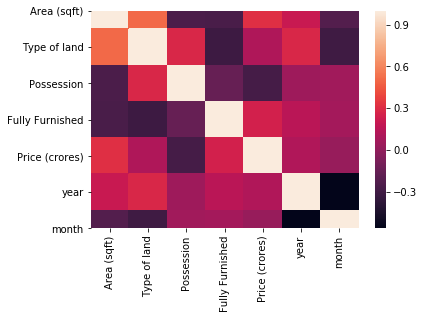

In [32]:
sns.heatmap(data.corr());

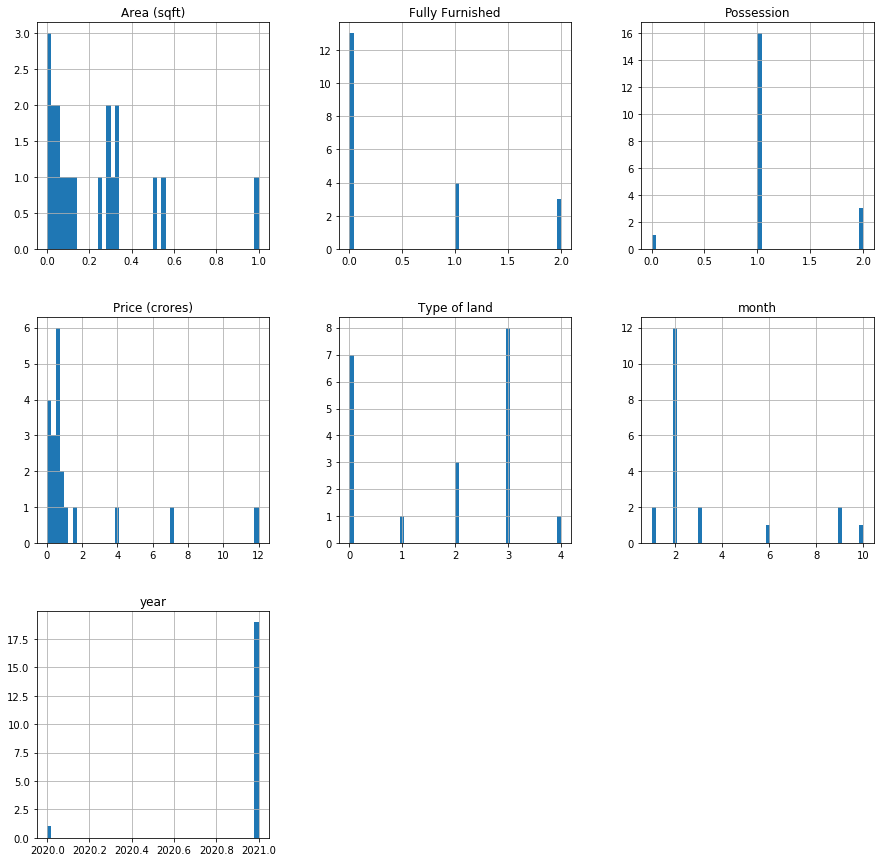

In [33]:
data.hist(bins=50, figsize=(15,15))
plt.show()